This notebook uses AutoPipelineForImg2Img.

In [1]:
from diffusers import AutoPipelineForImage2Image
import torch
import requests
from PIL import Image
from io import BytesIO

pipeline = AutoPipelineForImage2Image.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float16,
    use_safetensors=True,
).to("cuda")

url = "https://upload.wikimedia.org/wikipedia/commons/thumb/0/0f/1665_Girl_with_a_Pearl_Earring.jpg/800px-1665_Girl_with_a_Pearl_Earring.jpg"

response = requests.get(url)
input_image = Image.open(BytesIO(response.content)).convert("RGB")
input_image.thumbnail((768, 768))


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


  0%|          | 0/150 [00:00<?, ?it/s]

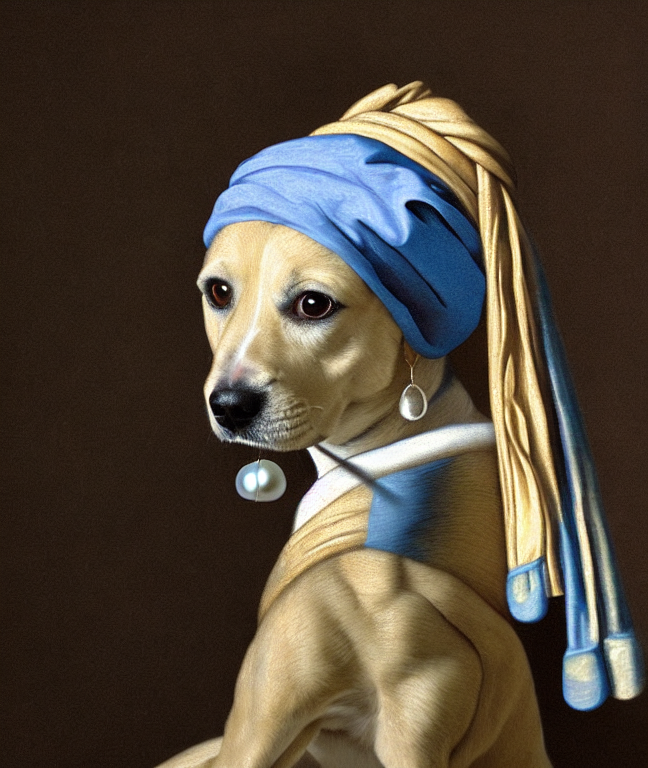

In [3]:
prompt = "a portrait of a dog wearing a pearl earring"
image = pipeline(prompt, image=input_image, num_inference_steps=200, strength=0.75, guidance_scale=10.5).images[0]
image